# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# 1. Is the distribution of body temperature normal?

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#find the statistics of the body temperature
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

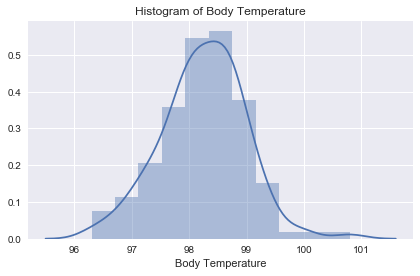

In [42]:
#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#The rule of thumb for choosing the number of bin
n_bins = int(np.sqrt(len(df.temperature)))

#plot the histogram to check if the distribution is normal.
sns.set()
sns.distplot(df.temperature, bins=n_bins)
#_ = plt.hist(df['temperature'], bins=n_bins)
_ = plt.xlabel('Body Temperature')
_ = plt.title('Histogram of Body Temperature')
plt.tight_layout()
plt.show()
#the plot looks like approximately normalized.
#the mean and median of the data is approximately equal

# 2. Is the sample size large? Are the observation independent? 

In [4]:
# Yes, the sample size is large enough, and the observations are independent.
# A sample size more than 30 is considered to be large enough size.
# The body temperature is observed from different person.
len(df.temperature)

130

# 3. Is the true population mean really 98.6 degree F?

In [5]:
'''H0: population mean = 98.6
Ha: population mean != 98.6'''
#level of significance = 0.05
#bootstrap method
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    '''Draw bootstrap replicates.'''
    #Initialize array of replicates
    bs_replicates = np.empty(size)
    #generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

#take 10,000 bootstrap replicates of the mean    
bs_replicates = draw_bs_reps(df.temperature, np.mean, size=10000)
# Compute p-value
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
p
'''Because the p-value we got from the bootstrap replicates is 0.0, 
which is less than 0.05
We reject that the null hypothesis, i.e. true population mean is 98.6 F.'''

0.0

# Would you use a one-sample or two sample test?
We will use one-sample, two tailed z-test, becaue we have a known
value 98.6 to test the hypothesis.

# In this situation, is it appropriate to use the t or z-statistics?
We will use z-statistics because the sample size is greater than 30.

In [52]:
# We assume,
# Level of significance = alpha = 0.05
# H0: population mean = 98.6
# Ha: population mean != 98.6.
# Now, frequentist statistical testing with z-score
pop_mean = 98.6
sample_mean = np.mean(df.temperature)
#because the sample size is greater than 100 and population st. deviation is not known
# we will assume sample std. deviation is approximately equal to population std. deviation
std = np.std(df.temperature)
n = len(df.temperature)
z = (sample_mean - pop_mean)/ (std/np.sqrt(n))
'''Both of the result rejected the null hypothesis:-
1. 
z-critical value alpha=0.05 for a two tail test is 1.96
if the calculated z-value is greater than 1.96 critical z-value,
then we will reject the null hypothesis.
2. 
When calculated p-value with the z-score from a calculator: 
P-value is less than 0.00001
Because the p-value is less than the level of significance, 
we reject the null hypothesis'''
z

-5.475925202078116

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?

In [61]:
# For a sample size less than 30, we must use t-statistics
# draw a small random sample of size 10 from the data
np.random.seed(1)
small_sample = np.random.choice(df.temperature, size=10, replace=False)
# H0: population mean = 98.6
# Ha: population mean != 98.6
# Level of significance = 0.05
# find the calculated t-value to compare with the critical t-value
pop_mean = 98.6
sample_mean = np.mean(small_sample)
std = np.std(small_sample)
n = 10
t = (sample_mean - pop_mean)/ (std/np.sqrt(n))
degree_of_freedom = n-1
'''
df = 9 
t = -2.072
Using the calculator P-value is 0.068
Because p-value is greater than 0.05, we fail to reject the null hypothesis'''
t

-2.0721547741640345

In [63]:
'''H0: population mean = 98.6
Ha: population mean != 98.6'''
#level of significance = 0.05
#bootstrap method
#take 10,000 bootstrap replicates of the mean    
bs_replicates = draw_bs_reps(small_sample, np.mean, size=10000)
# Compute p-value
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
p

0.0202

# What do you notice? What does this tell you about the difference in application of the t and z- statistics?
When the sample size is more than 30, we can use z-statistics. When the sample size is less than 30, we use t-statistics.


# 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [11]:
#level of significance = 0.05
#Critical value for z score is 1.96
standard_error = np.std(df.temperature) / np.sqrt(len(df.temperature))
margin_of_error = 1.96*standard_error
margin_of_error

0.125550964802579

In [12]:
#we should consider temperature<98.12 or temperature>98.37 to be abnormal.
confidence_interval = [np.mean(df.temperature)-margin_of_error, np.mean(df.temperature)+margin_of_error]
confidence_interval

[98.12367980442819, 98.37478173403336]

# 6. Is there a significant difference between males and females in normal temperature?

In [67]:
#seperate the body temperature by gender
#H0: male_mean - female_mean = 0
#Ha: male_mean - female_mean !=0
#level of significance = 5%
#critical z-value = 1.96
male_temp = df.temperature[df['gender']=='M']
female_temp = df.temperature[df['gender']=='F']
n_male = len(male_temp)
n_female = len(female_temp)
male_mean = np.mean(male_temp)
male_var = np.var(male_temp)
female_mean = np.mean(female_temp)
female_var = np.var(female_temp)
diff_mean = male_mean - female_mean
sampling_dist_std = np.sqrt((male_var/n_male) + (female_var/n_female))
#calculate z-score
z = (diff_mean - 0) / sampling_dist_std
margin_of_error = 1.96 * sampling_dist_std
margin_of_error
#margin_of_error tells us that the probability of getting diff_mean assuming
#null hypothesis is true is less than 5%

0.24613030301613179

In [68]:
#If P-value <0.05, reject H0
#From the table, p-value for -2.303 is 0.0212
#because the p-value is less than 0.05, we will reject the null hypothesis.
z

-2.3032202891940123

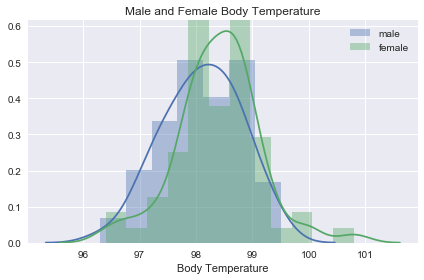

In [16]:
#Female mean body temperature is slightly greater than male mean body temperature
sns.distplot(male_temp)
sns.distplot(female_temp)
plt.xlabel('Body Temperature')
plt.title('Male and Female Body Temperature')
plt.legend(('male','female'))
plt.tight_layout()
plt.show()